### Milestone 2 - Instructions
Create a new notebook for this assignment named Milestone02_studentname.ipynb (replacing studentname with your own).

- Split prepared data from Milestone 1 into training and testing
- Build a decision tree model that detects faulty products
- Build an ensemble model that detects faulty products
- Build an SVM model
- Evaluate all three models
- Solicit specific feedback on your code (instructions below).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.tree import DecisionTreeClassifier 

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: F

In [3]:
pd.set_option('display.max_columns', 200)

### Read in data

In [4]:
# assign url variable where we will pull data from
url_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"

In [5]:
# add generic feature column names
names = ["feature" + str(x) for x in range(1, 591)]

In [6]:
# pull down the csv info into a pandas dataframe
data = pd.read_csv(url_data, sep=" ", names=names, header=None, dtype=None)

In [7]:
# check head of data 
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,...,feature491,feature492,feature493,feature494,feature495,feature496,feature497,feature498,feature499,feature500,feature501,feature502,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512,feature513,feature514,feature515,feature516,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature529,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538,feature539,feature540,feature541,feature542,feature543,feature544,feature545,feature546,feature547,feature548,feature549,feature550,feature551,feature552,feature553,feature554,feature555,feature556,feature557,feature558,feature559,feature560,feature561,feature562,feature563,feature564,feature565,feature566,feature567,feature568,feature569,feature570,feature571,feature572,feature573,feature574,feature575,feature576,feature577,feature578,feature579,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,...,48.2091,0.7578,NaN,2.9570,2.1739,10.0261,17.1202,22.3756,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.6707,0.0000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.9864,0.0,29.3804,0.1094,4.8560,3.1406,0.5064,6.6926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0570,4.0825,11.5074,0.1096,0.0078,0.0026,7.116,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,70.0,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,1.0,631.2618,205.1695,0.0,4.590,4.842,2853.0,0.9324,0.9479,4.6820,0.8073,352.0073,10.3092,113.9800,10.9036,19.1927,27.6301,697.1964,1.1598,154.3709,1.0,620.3582,82.3494,NaN,NaN,0.0,-0.0039,-0.0198,0.0004,-

In [8]:
# assign url variable where we will pull classification data from
url_classifications = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

In [9]:
# assign classification and date to labels
labels = pd.read_csv(url_classifications, sep=" ", names = ["classification","date"],parse_dates = ["date"])

### Merge data

In [10]:
# merge data with classification labels
df = pd.concat([data,labels], axis=1)

### Clean and prepare data

According to dataset information this data contains null values varying in intensity depending on the individuals features. 

The data is represented in a raw text file each line representing an individual example and the features seperated by spaces. The null values are represented by the 'NaN' value as per MatLab.

In [11]:
#replace missing values with median values
df.fillna(data.median(), inplace=True)

In [12]:
print(df.isnull().sum())

feature1          0
feature2          0
feature3          0
feature4          0
feature5          0
                 ..
feature588        0
feature589        0
feature590        0
classification    0
date              0
Length: 592, dtype: int64


In [13]:
# drop the date column
df = df.drop(['date'], axis=1)

In [14]:
# remove all columns with 0 std 
df = df.loc[:, df.std() > .0]

### Explore data

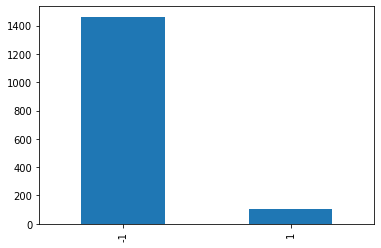

In [15]:
df['classification'].value_counts().plot(kind = 'bar')

### Handle class imbalance problem

#### Define predicators and target

X = All features minus the target, column "classification"

y = classification - simple pass/fail yield for in house line testing

In [16]:
# define X 
X = df.drop('classification', axis=1)

# define y
y = df['classification']

In [17]:
# use SMOTE to resample data from X, y
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({-1: 1463, 1: 1463})


In [18]:
# combine resampled x and y into new dataframe
resampled = pd.DataFrame(X_res, columns=X.columns)

resampled['classification'] = y_res

In [19]:
resampled.head()

,feature1,feature2,feature3,feature4,feature5,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature44,feature45,feature46,feature47,feature48,feature49,feature51,feature52,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,...,feature460,feature461,feature468,feature469,feature470,feature471,feature472,feature473,feature474,feature475,feature476,feature477,feature478,feature479,feature480,feature481,feature483,feature484,feature485,feature486,feature487,feature488,feature489,feature490,feature491,feature492,feature493,feature494,feature495,feature496,feature497,feature498,feature500,feature501,feature511,feature512,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature540,feature541,feature542,feature543,feature544,feature545,feature546,feature547,feature548,feature549,feature550,feature551,feature552,feature553,feature554,feature555,feature556,feature557,feature558,feature559,feature560,feature561,feature562,feature563,feature564,feature565,feature566,feature567,feature568,feature569,feature570,feature571,feature572,feature573,feature574,feature575,feature576,feature577,feature578,feature579,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,classification
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,624.3145,218.3174,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,608.1700,84.0793,152.2972,466.0817,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,0.11355,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,...,1.7924,29.9394,6.2052,311.6377,5.7277,2.7864,9.7752,63.7987,24.7625,13.6778,2.3394,31.9893,5.8142,0.0,1.6936,115.7408,613.3069,291.4842,494.6996,178.1759,843.1138,0.0000,53.1098,0.0000,48.2091,0.7578,8.00895,2.9570,2.1739,10.0261,17.1202,22.3756,0.0000,0.0000,64.6707,0.0000,0.1747,1.1543,1.5891,5.83295,1.9864,0.0,29.3804,0.1094,4.8560,3.1406,0.5064,6.6926,2.0570,4.0825,11.5074,0.1096,0.0078,0.0026,7.116,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,264.272,0.6510,5.16,0.11955,2.15045,0.04865,1.9997,16.98835,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.0204,0.0148,0.0047,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,631.2618,205.169

In [20]:
# redefine X 
X = resampled.drop('classification', axis=1)

# redefine y
Y = resampled['classification']

In [22]:
# use corr method to find the pairwise correlation of all columns in the dataframe
corr_matrix = df.corr()
corr_matrix

,feature1,feature2,feature3,feature4,feature5,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature44,feature45,feature46,feature47,feature48,feature49,feature51,feature52,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,...,feature460,feature461,feature468,feature469,feature470,feature471,feature472,feature473,feature474,feature475,feature476,feature477,feature478,feature479,feature480,feature481,feature483,feature484,feature485,feature486,feature487,feature488,feature489,feature490,feature491,feature492,feature493,feature494,feature495,feature496,feature497,feature498,feature500,feature501,feature511,feature512,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature540,feature541,feature542,feature543,feature544,feature545,feature546,feature547,feature548,feature549,feature550,feature551,feature552,feature553,feature554,feature555,feature556,feature557,feature558,feature559,feature560,feature561,feature562,feature563,feature564,feature565,feature566,feature567,feature568,feature569,feature570,feature571,feature572,feature573,feature574,feature575,feature576,feature577,feature578,feature579,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,classification
feature1,1.000000,-0.144161,0.004667,-0.006665,-0.010819,0.002028,0.031347,-0.052735,0.009091,0.006445,0.043432,0.010571,-0.007191,0.030745,-0.005720,0.012496,0.017997,-0.009350,0.025773,-0.011373,0.032438,-0.046631,-0.015075,0.107802,0.092542,0.106749,0.054828,-0.030918,-0.039741,-0.055994,-0.004630,-0.034015,-0.017629,-0.004498,0.017628,-0.035530,-0.042294,-0.034852,-0.006758,0.040578,-0.050537,0.053885,0.015588,-0.006072,-0.037488,0.004239,-0.019961,-0.050516,0.014775,0.022436,-0.025070,0.015531,-0.021465,-0.012648,-0.105721,-0.036916,0.033285,0.007996,-0.045733,-0.017677,-0.019816,-0.000472,-0.023135,0.033465,-0.001347,-0.000274,0.000211,0.004123,-0.029430,0.082382,0.025624,0.019914,0.071269,-0.116133,0.008173,0.039421,0.036955,0.006073,0.053791,0.000130,-0.018600,0.050358,-0.029585,-0.012823,0.012190,0.014710,-0.008695,0.003104,-0.006371,-0.040050,0.015871,-0.032758,-0.059082,0.030687,-0.023573,-0.048171,-0.072362,0.055114,0.010636,-0.007893,...,-0.012273,0.003616,0.021169,0.053301,-0.018019,-0.027188,-0.011117,0.013546,0.023195,0.003630,-0.024670,-0.019704,-0.031549,-0.029430,-0.028593,-0.036915,-0.011117,0.049351,-0.014583,-0.022911,-0.032859,0.077464,0.060133,-0.027801,-0.011995,-0.078953,-0.067407,-0.001867,-0.023709,-0.021932,0.004279,-0.016229,-0.051857,-0.019719,-0.062737,-0.019444,0.059183,0.053406,0.054110,-0.054501,-0.011752,0.014261,0.003484,0.000996,-0.004348,-0.011191,0.000054,-0.084442,0.080579,-0.024137,0.034325,0.082104,-0.003718,-0.048618,-0.015408,0.024481,0.026908,-0.089867,0.040143,-0.076206,-0.015702,0.038644,-0.092161,-0.017703,0.030178,-0.074258,-0.012310,0.029100,0.041412,0.040516,0.037916,-0.011308,-0.005846,0.062134,0.043867,0.060397,0.044608,0.063064,0.052853,-0.018987,-0.023194,0.013715,-0.002035,0.015242,0.007014,0.013265,0.008639,-0.026802,-0.055462,-0.055845,-0.035265,0.000190,0.023562,0.019994,0.023695,0.018534,-0.025867,-

In [23]:
# sort list by correlation value and print highest 10
corr_list = corr_matrix.sort_values(by=['classification'])
corr_list['classification'][-51:]

feature184        0.055588
feature198        0.056037
feature456        0.056256
feature478        0.056275
feature552        0.058140
feature555        0.058195
feature558        0.058296
feature472        0.059863
feature64         0.060035
feature461        0.060625
feature201        0.060645
feature96         0.061023
feature57         0.064267
feature101        0.065066
feature388        0.066315
feature250        0.066478
feature134        0.067788
feature115        0.068655
feature438        0.069366
feature124        0.072306
feature520        0.074005
feature131        0.076592
feature65         0.076674
feature160        0.077281
feature80         0.077723
feature34         0.080968
feature295        0.081183
feature248        0.083231
feature166        0.083493
feature301        0.084075
feature122        0.085084
feature300        0.087288
feature165        0.087289
feature161        0.089233
feature296        0.091380
feature125        0.094168
feature164        0.099506
f

In [24]:
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

mi = X.apply(calc_MI, axis=0, y=y, bins=20)

ValueError: ('Can only compare identically-labeled Series objects', 'occurred at index feature1')

In [ ]:
# print mutual information scores

d = []
for feature, mi_value in mi.iteritems():
    if mi_value >.05:
        d.append({'feature': feature, 'mi score': mi_value})
        
d = pd.DataFrame(d)
d.sort_values(by=['mi score'], ascending=0)

In [ ]:
d['feature']

### Split the data into training and testing sets

In [20]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

### Build a decision tree model that detects faulty products

#### Train Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier 

# Use entropy = no limit on samples for split
model_ent = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train) 
y_ent_pred = model_ent.predict(X_test)

# Use information gain (default) limit min_samples to 4
model_gini = DecisionTreeClassifier(min_samples_leaf=10,max_depth=5).fit(X_train, y_train)
y_gini_pred = model_gini.predict(X_test)

#### Testing and Evaluate Decision Tree

In [22]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))

Entropy accuracy is : 90.78498293515358%
Gini accuracy is : 85.83617747440273%


In [23]:
from sklearn import tree

# assign features names
columns = list(X.columns.values)


#create a visualization of the tree
dotfile1 = open("bc_ent.dot", 'w')
tree.export_graphviz(model_ent, out_file = dotfile1, filled=True, rounded=True, feature_names = columns) #columns[0:8]
dotfile1.close()

# Convert the dot file to a png
from subprocess import check_call
check_call(['dot','-Tpng','bc_ent.dot','-o','bc_ent.png'])

0

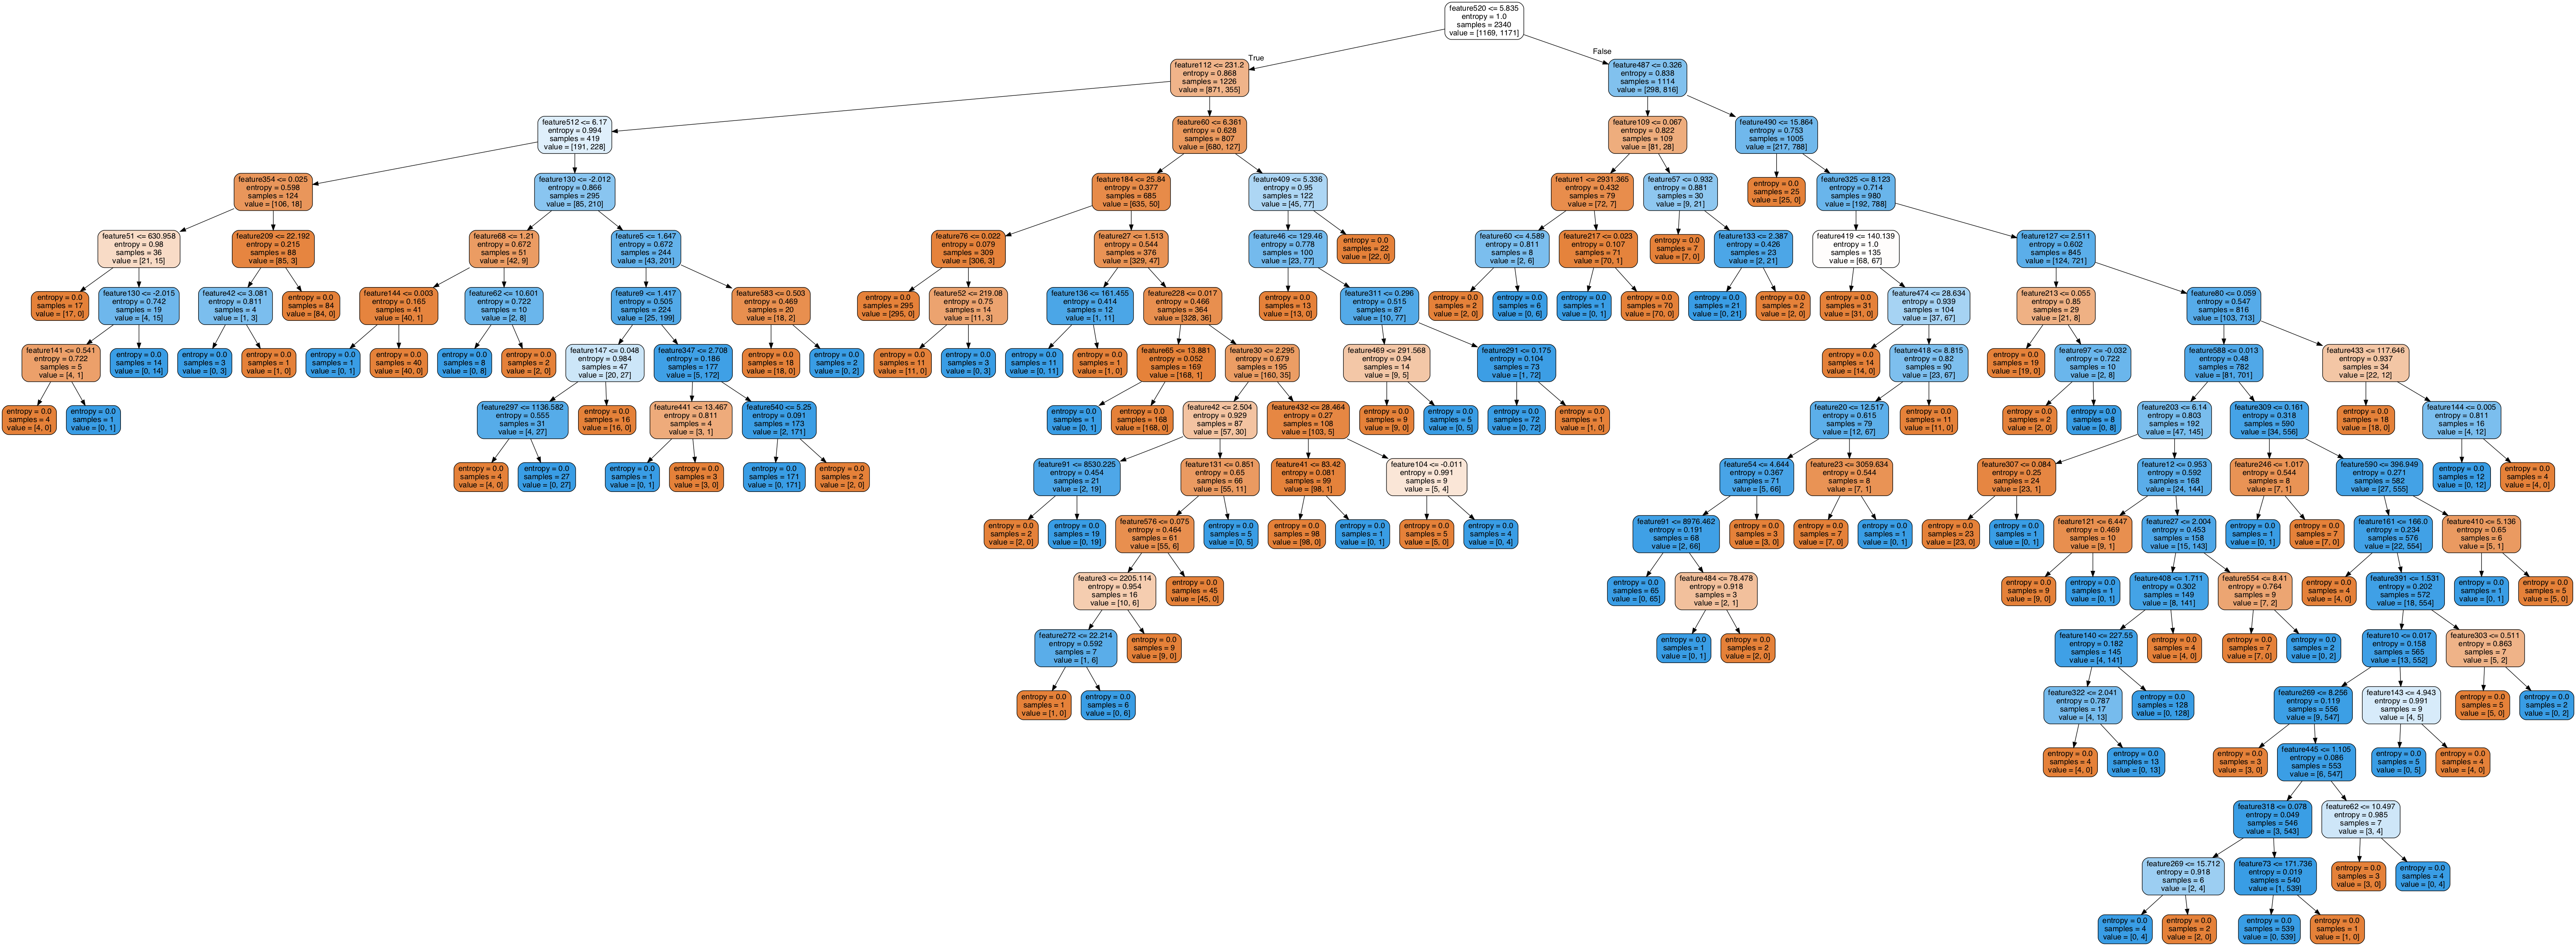

In [24]:
from IPython.display import Image
Image(filename='bc_ent.png', width=1500, height=1500)

### Build an ensemble model that detects faulty products

#### Train the Random Forest Model

In [25]:
nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=nTrees, max_depth=max_depth, random_state=0, verbose=verbose, min_samples_leaf=min_node_size)
clf.fit(X_train, y_train)
print(clf.feature_importances_)

[1.16513720e-03 3.80290873e-05 5.83838526e-04 3.03006776e-04
 7.24692721e-04 8.84938322e-04 0.00000000e+00 4.27500825e-03
 2.86753926e-04 4.91811538e-04 1.83945246e-03 4.77684699e-04
 3.87088864e-04 6.71390925e-04 9.72416763e-04 1.33379915e-04
 3.77988298e-05 2.00076128e-03 5.36801199e-04 5.89560509e-03
 9.36266299e-04 2.67631379e-04 4.29950434e-04 7.77883303e-04
 7.23946626e-04 5.33418246e-04 5.77711104e-03 3.78487109e-04
 3.35017654e-04 4.71223741e-03 3.87438362e-03 9.90014655e-03
 1.00773185e-03 5.24770340e-04 7.06660342e-04 7.75917125e-04
 3.03484556e-04 5.60788710e-04 2.41632894e-02 2.11595645e-03
 1.99574668e-03 8.28387463e-04 8.52559253e-04 7.46346957e-04
 1.01073123e-04 7.96647414e-04 5.19813401e-04 3.63497297e-04
 1.39366192e-03 1.65354603e-04 7.10273732e-04 2.42965202e-03
 5.06731349e-04 5.91661514e-03 2.82513953e-02 6.93339021e-05
 7.45517401e-04 7.46603757e-05 6.52765001e-04 3.07746479e-03
 2.23045967e-03 5.15176896e-04 9.41318106e-04 3.85317565e-04
 9.32505503e-04 4.354101

#### Testing and Evaluate RF Model

In [26]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

Y_test_hat = clf.predict(X_test)

print("Accuracy is : {}%".format(accuracy_score(y_test, Y_test_hat)*100))

Accuracy is : 93.1740614334471%


### Build an SVM model

In [27]:
cost = 1 # penalty parameter of the error term
gamma = 5 # defines the influence of input vectors on the margins

In [ ]:
from sklearn import svm, metrics
from sklearn.metrics import classification_report

# Train a LinearSVC
clf1 = svm.LinearSVC(C=cost).fit(X_train, y_train)
clf1.predict(X_test)
print("LinearSVC")
print(classification_report(clf1.predict(X_test), y_test))

# Test linear, rbf and poly kernels
for k in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(gamma=gamma, kernel=k, C=cost).fit(X_train, y_train)
    clf.predict(X_test)
    print(k)
    print(classification_report(clf.predict(X_test), y_test))

--------------------------------------------------

### Apply feature selection techniques to reduce dimensionality of data

### Filter methods

In [25]:
# use corr method to find the pairwise correlation of all columns in the dataframe
corr_matrix = df.corr()
corr_matrix

,feature1,feature2,feature3,feature4,feature5,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature44,feature45,feature46,feature47,feature48,feature49,feature51,feature52,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,...,feature460,feature461,feature468,feature469,feature470,feature471,feature472,feature473,feature474,feature475,feature476,feature477,feature478,feature479,feature480,feature481,feature483,feature484,feature485,feature486,feature487,feature488,feature489,feature490,feature491,feature492,feature493,feature494,feature495,feature496,feature497,feature498,feature500,feature501,feature511,feature512,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature540,feature541,feature542,feature543,feature544,feature545,feature546,feature547,feature548,feature549,feature550,feature551,feature552,feature553,feature554,feature555,feature556,feature557,feature558,feature559,feature560,feature561,feature562,feature563,feature564,feature565,feature566,feature567,feature568,feature569,feature570,feature571,feature572,feature573,feature574,feature575,feature576,feature577,feature578,feature579,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,classification
feature1,1.000000,-0.144161,0.004667,-0.006665,-0.010819,0.002028,0.031347,-0.052735,0.009091,0.006445,0.043432,0.010571,-0.007191,0.030745,-0.005720,0.012496,0.017997,-0.009350,0.025773,-0.011373,0.032438,-0.046631,-0.015075,0.107802,0.092542,0.106749,0.054828,-0.030918,-0.039741,-0.055994,-0.004630,-0.034015,-0.017629,-0.004498,0.017628,-0.035530,-0.042294,-0.034852,-0.006758,0.040578,-0.050537,0.053885,0.015588,-0.006072,-0.037488,0.004239,-0.019961,-0.050516,0.014775,0.022436,-0.025070,0.015531,-0.021465,-0.012648,-0.105721,-0.036916,0.033285,0.007996,-0.045733,-0.017677,-0.019816,-0.000472,-0.023135,0.033465,-0.001347,-0.000274,0.000211,0.004123,-0.029430,0.082382,0.025624,0.019914,0.071269,-0.116133,0.008173,0.039421,0.036955,0.006073,0.053791,0.000130,-0.018600,0.050358,-0.029585,-0.012823,0.012190,0.014710,-0.008695,0.003104,-0.006371,-0.040050,0.015871,-0.032758,-0.059082,0.030687,-0.023573,-0.048171,-0.072362,0.055114,0.010636,-0.007893,...,-0.012273,0.003616,0.021169,0.053301,-0.018019,-0.027188,-0.011117,0.013546,0.023195,0.003630,-0.024670,-0.019704,-0.031549,-0.029430,-0.028593,-0.036915,-0.011117,0.049351,-0.014583,-0.022911,-0.032859,0.077464,0.060133,-0.027801,-0.011995,-0.078953,-0.067407,-0.001867,-0.023709,-0.021932,0.004279,-0.016229,-0.051857,-0.019719,-0.062737,-0.019444,0.059183,0.053406,0.054110,-0.054501,-0.011752,0.014261,0.003484,0.000996,-0.004348,-0.011191,0.000054,-0.084442,0.080579,-0.024137,0.034325,0.082104,-0.003718,-0.048618,-0.015408,0.024481,0.026908,-0.089867,0.040143,-0.076206,-0.015702,0.038644,-0.092161,-0.017703,0.030178,-0.074258,-0.012310,0.029100,0.041412,0.040516,0.037916,-0.011308,-0.005846,0.062134,0.043867,0.060397,0.044608,0.063064,0.052853,-0.018987,-0.023194,0.013715,-0.002035,0.015242,0.007014,0.013265,0.008639,-0.026802,-0.055462,-0.055845,-0.035265,0.000190,0.023562,0.019994,0.023695,0.018534,-0.025867,-

In [26]:
# sort list by correlation value and print highest 10
corr_list = corr_matrix.sort_values(by=['classification'])
corr_list['classification'][-51:]

feature184        0.055588
feature198        0.056037
feature456        0.056256
feature478        0.056275
feature552        0.058140
feature555        0.058195
feature558        0.058296
feature472        0.059863
feature64         0.060035
feature461        0.060625
feature201        0.060645
feature96         0.061023
feature57         0.064267
feature101        0.065066
feature388        0.066315
feature250        0.066478
feature134        0.067788
feature115        0.068655
feature438        0.069366
feature124        0.072306
feature520        0.074005
feature131        0.076592
feature65         0.076674
feature160        0.077281
feature80         0.077723
feature34         0.080968
feature295        0.081183
feature248        0.083231
feature166        0.083493
feature301        0.084075
feature122        0.085084
feature300        0.087288
feature165        0.087289
feature161        0.089233
feature296        0.091380
feature125        0.094168
feature164        0.099506
f

In [27]:
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

mi = X.apply(calc_MI, axis=0, y=y, bins=20)

ValueError: ('Can only compare identically-labeled Series objects', 'occurred at index feature1')

In [ ]:
# print mutual information scores

d = []
for feature, mi_value in mi.iteritems():
    if mi_value >=.05:
        d.append({'feature': feature, 'mi score': mi_value})
        
d = pd.DataFrame(d)
d.sort_values(by=['mi score'], ascending=0)

### Stepwise Model Selection

#### Backward model selection

In [ ]:
# Recursive Feature Elimination
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
selector = RFE(estimator, 20, step=1)#select features. Step=1 means each step only remove 1 variable from the model
selector = selector.fit(X, y)
print(selector.support_) # The mask of selected features.
print(selector.ranking_) # selected features are ranked 1. The 6th is the one that is removed first,
                         # 2nd is the one that is removed last

In [ ]:
# select features and assign to list
feature_index = selector.get_support(True)
topfeatures = feature_index.tolist()

In [ ]:
colname = data.columns[topfeatures]
print (colname)

#### Forward Stepwise Feature Selection


In [ ]:
# I decreased k_features to 20 for sharing; however, on previous run I found that at ~130 
# k_features performance reacheda a plateau.

In [ ]:
# Forward Stepwise Feature Selection
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


lr = LinearRegression()

sfs = SFS(lr, 
          k_features=20, # k_features has to be smaller or equal to the number of features. If equal to, it starts from
                         # intercept to the full model
          forward=True,  # forward
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(25,10))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
sfs.get_metric_dict()[20]

#### LASSO

In [ ]:
# LASSO
from sklearn import linear_model

alpha = 1 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)
clf.fit(X, y)

print(clf.coef_)

print(clf.intercept_)

In [ ]:
coeff_lasso = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coeff_lasso.columns = ['feature', 'coeff']

In [ ]:
coeff_lasso.sort_values(by='coeff', ascending=0)[:20]

#### Ridge Regression

In [ ]:
# Ridge Regression
from sklearn import linear_model
alpha = 500 
clf = linear_model.Ridge(alpha=alpha)
clf.fit(X, y)

print(clf.coef_)

print(clf.intercept_)

import numpy as np
# Increasing alpha can compress the L2 norm of the coefficients to 0 (but not selecting variables)
print("Sum of square of coefficients = %.2f"%np.sum(clf.coef_**2)) 

In [ ]:
coeff_ridge = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coeff_ridge.columns = ['feature', 'coeff']

In [ ]:
coeff_ridge.sort_values(by='coeff', ascending=0)[:20]

### Decision Tree

#### Train Decision Tree

In [ ]:
# Use entropy = no limit on samples for split
model_ent = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train) 
y_ent_pred = model_ent.predict(X_test)

# Use information gain (default) limit min_samples to 4
model_gini = DecisionTreeClassifier(min_samples_leaf=4).fit(X_train, y_train)
y_gini_pred = model_gini.predict(X_test)

#### Testing and Evaluate Decision Tree

In [ ]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))

### Initial Findings

While each feature selection produced different results, there were some common features that appeared.
The most common feature across methods was feature60, which had high scores for correlation, mutual information,
and Lasso. It featured using the other methods as well. 

Other features which appeared across multiple methods were feature511, feature104, feature130, feature65, and feature41.

Other features received high scores in one method; however, did not seem to appear in others including feature349, feature407, feature564.

##### Correlation

In [ ]:
corr_list['classification'][-51:]

##### Mutual Information

In [ ]:
d.sort_values(by=['mi score'], ascending=0)

##### Backward model selection

In [ ]:
colname = data.columns[topfeatures]
print (colname)

#### Forward Stepwise Feature Selection

In [ ]:
sfs.get_metric_dict()[20]

##### Lasso

In [ ]:
coeff_lasso.sort_values(by='coeff', ascending=0)[:25]

##### Ridge

In [ ]:
coeff_ridge.sort_values(by='coeff', ascending=0)[:25]

### Instructions to Solicit Feedback
Write 2-3 questions soliciting feedback on specific aspects on the assignment. For example, if you did something one way but are unsure if there might be a different or better way to do it, ask for feedback on that part. You may submit these questions by commenting out in the code within your .ipynb file or by typing them below your file name in the Your Response box on the Submit Milestone Assignment page. While the questions you submit will have no bearing on your grade, by doing so, you will engage more actively with the assignment and we will also be able to give you pointed feedback.

1. For Backward model selection, how does one know the correct number of features to initially select? For example, when defining selector = RFE(estimator, 15, step=1).
 

2. When compasing features using methods such as Mutual Information, Lasso, or Ridge, it seems there is a long-tail of features and their coeff. What is the best way to approach the long-tail? In other words, what is the best way to draw the line of features to include/exclude?

3. How does one decide which alpha to use for Ridge Regression?